<font color='blue'>The Preprocess Operations:</font> 

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import ShuffleSplit

# Read Data and split them to Train and Test sets
Xy = pd.read_csv("Data.csv")

#Generate a smaller resample of dataset
#Xy = resample(Xy, n_samples=3000, random_state=0)

#find out if there is any Inf value and then replcae them with NaN
#print(np.where(X.values[738] >= np.finfo(np.float64).max)) 
Xy = Xy.replace([np.inf, -np.inf], -1) 

#Find out if there is any NaN in the dataframe and then remove it and reset the indexes 
#print(np.where(np.isnan(X))) 
Xy = Xy.dropna()
Xy = Xy.reset_index(drop=True)

#Separate examples and labels
y = Xy['marker']
X = Xy.drop(labels='marker', axis=1) #Removes the marker column from the dataframe


#dreate sclaed data
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
scaledy = y

#Create oversampled data
attackClass = Xy[Xy['marker'] == 'Attack']  # separate classes
noEvClass = Xy[Xy['marker'] == 'NoEvents']  # separate classes
naturalClass = Xy[Xy['marker'] == 'Natural']  # separate classes
oversampledNoEvClass = resample(noEvClass, replace=True, n_samples=attackClass.shape[0], random_state=27)
overampledNaturalClass = resample(naturalClass, replace=True, n_samples=attackClass.shape[0], random_state=27)
oversampledXy = pd.concat([pd.concat([attackClass, oversampledNoEvClass]), overampledNaturalClass])
oversampledy = oversampledXy['marker']
oversampledX = oversampledXy.drop(labels='marker', axis=1) #Removes the marker column from the dataframe

#Create subsampled data
attackClass = Xy[Xy['marker'] == 'Attack']  # separate classes
noEvClass = Xy[Xy['marker'] == 'NoEvents']  # separate classes
naturalClass = Xy[Xy['marker'] == 'Natural']  # separate classes
subsamplesAttackClass = resample(attackClass, replace=True, n_samples=naturalClass.shape[0], random_state=27)
subsampledXy = pd.concat([pd.concat([subsamplesAttackClass, noEvClass]), naturalClass])
subsampledy = subsampledXy['marker']
subsampledX = subsampledXy.drop(labels='marker', axis=1) #Removes the marker column from the dataframe

#Create oversampled data
scaler = StandardScaler()
scaledOversampledX = scaler.fit_transform(oversampledX)
scaledOversampledy = oversampledy

#Create undersampled data
scaler = StandardScaler()
scaledSubsampledX = scaler.fit_transform(subsampledX)
scaledSubsampledy = subsampledy

#Model Initialization
crossNumber = 2     #The number of folds in cross validation
kFold = ShuffleSplit(n_splits=crossNumber, test_size=0.3, random_state=0) #the split methos in cross validation
maxK = 10                      #The Number of maximum K that will be evaluated in KNN

print('The Number of Examples: ', X.shape[0])
print('The Number of Features: ', X.shape[1])
print('The Number of Subsampled Examples: ', oversampledX.shape[0])
print('The Number of Oversampled Examples: ', subsampledX.shape[0])

The Number of Examples:  78377
The Number of Features:  128
The Number of Subsampled Examples:  166989
The Number of Oversampled Examples:  41023


<font color='blue'>Using unscaled KNN for different values for K:</font> 



The K value is:  1
The Mean Fit Time:  7.32341992855072
The Mean Score Time:  13.091497659683228
The averaged F1 Score:  0.8139085567299145


The K value is:  2
The Mean Fit Time:  7.425147652626038
The Mean Score Time:  15.410797357559204
The averaged F1 Score:  0.7614368455790644


The K value is:  3
The Mean Fit Time:  7.280547857284546
The Mean Score Time:  16.751713037490845
The averaged F1 Score:  0.769729509832118


The K value is:  4
The Mean Fit Time:  7.111517667770386
The Mean Score Time:  17.368531465530396
The averaged F1 Score:  0.7340091368771502


The K value is:  5
The Mean Fit Time:  6.876618146896362
The Mean Score Time:  17.845272421836853
The averaged F1 Score:  0.7365086976137322


The K value is:  6
The Mean Fit Time:  6.974853754043579
The Mean Score Time:  18.654621601104736
The averaged F1 Score:  0.707320750036426


The K value is:  7
The Mean Fit Time:  6.928975820541382
The Mean Score Time:  19.33979082107544
The averaged F1 Score:  0.7096397796802918


T

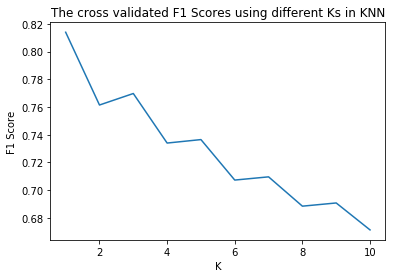

In [6]:
#Scenario 1
from sklearn.neighbors import KNeighborsClassifier
import time
import matplotlib.pylab as plt
from sklearn.model_selection import cross_validate

#Initiallization
neighbors = np.arange(1, maxK+1)
scores1 = np.array([])     

#Evaluate differnt Ks
for k in neighbors:
    print('\n\nThe K value is: ', k)
    #The classifier
    clf = KNeighborsClassifier(n_neighbors=k)       #The defult destance is Euclidian
    #Cross Validation
    output1 = cross_validate(clf, X, y, cv=kFold, scoring='f1_macro', return_estimator=True)
    scores1 = np.append(scores1, output1['test_score'].mean())
    print('The Mean Fit Time: ', np.mean(output1['fit_time']))
    print('The Mean Score Time: ', np.mean(output1['score_time']))
    print('The averaged F1 Score: ', scores1[k-1])
    
#Report the best K based on the average F-Score from cross validation for each K
optimal_k_1 = np.argmax(scores1) + 1
print("\nThe optimal number of neighbors is:", optimal_k_1)

#Plot the results
f = plt.figure()
plt.plot(neighbors, scores1)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('The cross validated F1 Scores using different Ks in KNN')
plt.show()
f.savefig("KNN-Scen1.png", bbox_inches='tight', dpi=600)

<font color='blue'>Using scaled features in KNN for different values for K:</font> 



The K value is:  1
The Mean Fit Time:  8.433465838432312
The Mean Score Time:  54.76557958126068
The averaged F1 Score:  0.8798975454878311


The K value is:  2
The Mean Fit Time:  8.336742997169495
The Mean Score Time:  69.23290944099426
The averaged F1 Score:  0.8448865738725235


The K value is:  3
The Mean Fit Time:  8.55872929096222
The Mean Score Time:  82.99839699268341
The averaged F1 Score:  0.8396045429802421


The K value is:  4
The Mean Fit Time:  8.591033220291138
The Mean Score Time:  87.98684883117676
The averaged F1 Score:  0.8091607775180806


The K value is:  5
The Mean Fit Time:  8.226503491401672
The Mean Score Time:  91.19966280460358
The averaged F1 Score:  0.803415929139562


The K value is:  6
The Mean Fit Time:  8.213539838790894
The Mean Score Time:  97.62598204612732
The averaged F1 Score:  0.7728492404770286


The K value is:  7
The Mean Fit Time:  8.894112825393677
The Mean Score Time:  109.33632802963257
The averaged F1 Score:  0.7679709926952478


The K

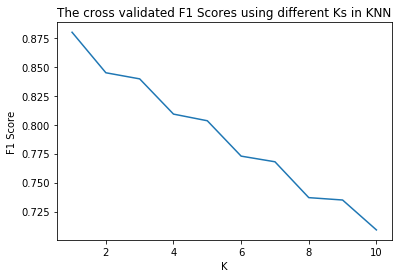

In [7]:
#Scenario 2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pylab as plt
from sklearn.model_selection import cross_validate

#Initiallization
neighbors = np.arange(1, maxK+1)
scores2 = np.array([])          #An array to save FScore of different Ks

#Evaluate differnt Ks
for k in neighbors:
    print('\n\nThe K value is: ', k)
    #The classifier
    clf = KNeighborsClassifier(n_neighbors=k)     #The defult destance is Euclidian
    #Cross Validation
    output2 = cross_validate(clf, scaledX, scaledy, cv=kFold, scoring='f1_macro', return_estimator=True)         
    scores2 = np.append(scores2, output2['test_score'].mean())
    print('The Mean Fit Time: ', np.mean(output2['fit_time']))
    print('The Mean Score Time: ', np.mean(output2['score_time']))
    print('The averaged F1 Score: ', scores2[k-1])
    
#Report the best K based on the average F-Score from cross validation for each K
optimal_k_2 = np.argmax(scores2) + 1
print("\nThe optimal number of neighbors is:", optimal_k_2)

#Plot the results
f = plt.figure()
plt.plot(neighbors, scores2)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('The cross validated F1 Scores using different Ks in KNN')
plt.show()
f.savefig("KNN-Scen2.png", bbox_inches='tight', dpi=600)


<font color='blue'>Using scaled features in KNN with Manhatan distance for different values for K:</font> 



The K value is:  1
The Mean Fit Time:  8.560125350952148
The Mean Score Time:  67.30810678005219
The averaged F1 Score:  0.8970893980872447


The K value is:  2
The Mean Fit Time:  9.268249750137329
The Mean Score Time:  86.76807773113251
The averaged F1 Score:  0.8591845144109747


The K value is:  3
The Mean Fit Time:  8.379096150398254
The Mean Score Time:  97.26401448249817
The averaged F1 Score:  0.8541982140050433


The K value is:  4
The Mean Fit Time:  8.79748022556305
The Mean Score Time:  105.35868513584137
The averaged F1 Score:  0.8212081372513332


The K value is:  5
The Mean Fit Time:  8.813951253890991
The Mean Score Time:  112.36731553077698
The averaged F1 Score:  0.8141174905440491


The K value is:  6
The Mean Fit Time:  8.5371572971344
The Mean Score Time:  118.20572423934937
The averaged F1 Score:  0.7791944938150053


The K value is:  7
The Mean Fit Time:  8.781522631645203
The Mean Score Time:  121.4782646894455
The averaged F1 Score:  0.7764609152850055


The 

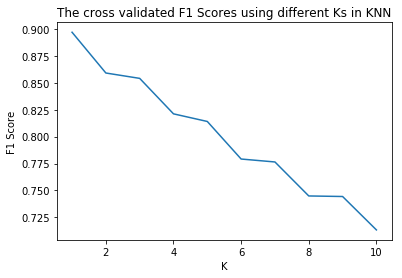

In [8]:
#Scenario 3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pylab as plt
from sklearn.model_selection import cross_validate

#Initiallization
neighbors = np.arange(1,maxK+1)
scores3 = np.array([])          #An array to save FScore of different Ks


#Evaluate differnt Ks
for k in neighbors:
    print('\n\nThe K value is: ', k)
    #The classifier
    clf = KNeighborsClassifier(n_neighbors=k, p=1) # p=1 is Manhatam distance    
    #Cross Validation
    output3 = cross_validate(clf, scaledX, scaledy, cv=kFold, scoring='f1_macro', return_estimator=True)         
    scores3 = np.append(scores3, output3['test_score'].mean())
    print('The Mean Fit Time: ', np.mean(output3['fit_time']))
    print('The Mean Score Time: ', np.mean(output3['score_time']))
    print('The averaged F1 Score: ', scores3[k-1])
    
#Report the best K based on the average F-Score from cross validation for each K
optimal_k_3 = np.argmax(scores3) + 1
print("\nThe optimal number of neighbors is:", optimal_k_3)

#Plot the results
f = plt.figure()
plt.plot(neighbors, scores3)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('The cross validated F1 Scores using different Ks in KNN')
plt.show()
f.savefig("KNN-Scen3.png", bbox_inches='tight', dpi=600)

<font color='blue'>Using scaled feature selection (L1 norm) in KNN for different values for K:</font> 

C:\Users\Mohammad\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



The numer of features after feture sparsing:  92


The K value is:  1
The Mean Fit Time:  3.0822718143463135
The Mean Score Time:  42.653942227363586
The averaged F1 Score:  0.8710583425098151


The K value is:  2
The Mean Fit Time:  3.0453559160232544
The Mean Score Time:  53.21822762489319
The averaged F1 Score:  0.8383004919001324


The K value is:  3
The Mean Fit Time:  3.029901146888733
The Mean Score Time:  60.13272452354431
The averaged F1 Score:  0.8314534118100265


The K value is:  4
The Mean Fit Time:  3.018928289413452
The Mean Score Time:  65.22263145446777
The averaged F1 Score:  0.7988113682811502


The K value is:  5
The Mean Fit Time:  3.090755343437195
The Mean Score Time:  69.45861220359802
The averaged F1 Score:  0.7935746681538143


The K value is:  6
The Mean Fit Time:  3.0149683952331543
The Mean Score Time:  73.1075394153595
The averaged F1 Score:  0.7647478086958099


The K value is:  7
The Mean Fit Time:  3.014941930770874
The Mean Score Time:  76.36782300472

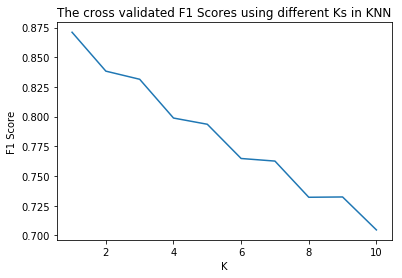

In [9]:
#Scenario 4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pylab as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

#Initiallization
neighbors = np.arange(1,maxK+1)
scores4 = np.array([])          #An array to save FScore of different Ks


#Feature Selection (Sparse Features)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(scaledX, scaledy)
model = SelectFromModel(lsvc, prefit=True)
fSelX = model.transform(scaledX)          #feature selected X
fSely = scaledy
print('\nThe numer of features after feture sparsing: ',fSelX.shape[1])


#Evaluate differnt Ks
for k in neighbors:
    print('\n\nThe K value is: ', k)
    #The classifier
    clf = KNeighborsClassifier(n_neighbors=k)      #The defult destance is Euclidian   
    #Cross Validation
    output4 = cross_validate(clf, fSelX, fSely, cv=kFold, scoring='f1_macro', return_estimator=True)         
    scores4 = np.append(scores4, output4['test_score'].mean())
    print('The Mean Fit Time: ', np.mean(output4['fit_time']))
    print('The Mean Score Time: ', np.mean(output4['score_time']))
    print('The averaged F1 Score: ', scores4[k-1])
    
#Report the best K based on the average F-Score from cross validation for each K
optimal_k_4 = np.argmax(scores4) + 1
print("\nThe optimal number of neighbors is:", optimal_k_4)

#Plot the results
f = plt.figure()
plt.plot(neighbors, scores4)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('The cross validated F1 Scores using different Ks in KNN')
plt.show()
f.savefig("KNN-Scen4.png", bbox_inches='tight', dpi=600)

<font color='blue'>Using scaled dimensionality reduction (PCA) in KNN for different values for K:</font> 


The numer of features after feture reduction:  60


The K value is:  1
The Mean Fit Time:  0.35257208347320557
The Mean Score Time:  9.07473909854889
The averaged F1 Score:  0.8797146889157117


The K value is:  2
The Mean Fit Time:  0.3450751304626465
The Mean Score Time:  12.942881226539612
The averaged F1 Score:  0.8432936095540979


The K value is:  3
The Mean Fit Time:  0.3669869899749756
The Mean Score Time:  15.676118016242981
The averaged F1 Score:  0.8383205864573837


The K value is:  4
The Mean Fit Time:  0.36153078079223633
The Mean Score Time:  17.82968044281006
The averaged F1 Score:  0.807750174620935


The K value is:  5
The Mean Fit Time:  0.4423329830169678
The Mean Score Time:  22.998143196105957
The averaged F1 Score:  0.8028227705302725


The K value is:  6
The Mean Fit Time:  0.6702078580856323
The Mean Score Time:  25.35458266735077
The averaged F1 Score:  0.7715542058576137


The K value is:  7
The Mean Fit Time:  0.3640584945678711
The Mean Score Time:  23.585

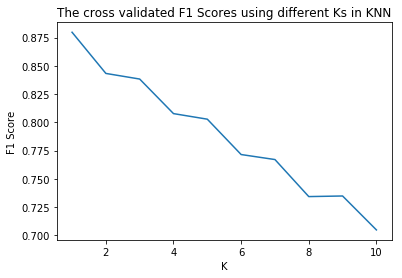

In [11]:
#Scenario 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate

#Initiallization
pFeatNum = 60                  #The number of projected features in feature reduction
neighbors = np.arange(1,maxK+1)
scores5 = np.array([])          #An array to save FScore of different Ks

#Feature Reduction
pca = PCA(n_components = pFeatNum)
fReducedX = pca.fit_transform(scaledX)
fReducedy = scaledy
print('\nThe numer of features after feture reduction: ',pFeatNum)

#Evaluate differnt Ks
for k in neighbors:
    print('\n\nThe K value is: ', k)
    #The classifier
    clf = KNeighborsClassifier(n_neighbors=k)      #The defult destance is Euclidian   
    #Cross Validation
    output5 = cross_validate(clf, fReducedX, fReducedy, cv=kFold, scoring='f1_macro', return_estimator=True)         
    scores5 = np.append(scores5, output5['test_score'].mean())
    print('The Mean Fit Time: ', np.mean(output5['fit_time']))
    print('The Mean Score Time: ', np.mean(output5['score_time']))
    print('The averaged F1 Score: ', scores5[k-1])
    
#Report the best K based on the average F-Score from cross validation for each K
optimal_k_5 = np.argmax(scores5) + 1
print("\nThe optimal number of neighbors is:", optimal_k_5)

#Plot the results
f = plt.figure()
plt.plot(neighbors, scores5)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('The cross validated F1 Scores using different Ks in KNN')
plt.show()
f.savefig("KNN-Scen5.png", bbox_inches='tight', dpi=600)

<font color='blue'>Using subsampling, scaling, and feature selection in KNN for different values for K:</font> 

C:\Users\Mohammad\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



The numer of features after feature sparsing:  102


The K value is:  1
The Mean Fit Time:  1.4900121688842773
The Mean Score Time:  5.437960863113403
The averaged F1 Score:  0.8310584579846954


The K value is:  2
The Mean Fit Time:  1.295066237449646
The Mean Score Time:  5.774048089981079
The averaged F1 Score:  0.7862786236791484


The K value is:  3
The Mean Fit Time:  1.3010543584823608
The Mean Score Time:  6.167991399765015
The averaged F1 Score:  0.7822932088971214


The K value is:  4
The Mean Fit Time:  1.2950495481491089
The Mean Score Time:  6.896842002868652
The averaged F1 Score:  0.757430554298073


The K value is:  5
The Mean Fit Time:  1.3319588899612427
The Mean Score Time:  7.431100130081177
The averaged F1 Score:  0.7482723564921077


The K value is:  6
The Mean Fit Time:  1.2721260786056519
The Mean Score Time:  7.35532820224762
The averaged F1 Score:  0.7315135711076222


The K value is:  7
The Mean Fit Time:  1.3114774227142334
The Mean Score Time:  7.634588479

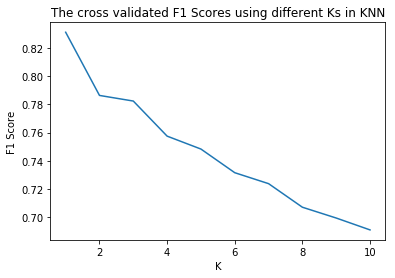

In [12]:
#Scenario 6
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pylab as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.utils import resample


#Initiallization
neighbors = np.arange(1,maxK+1)
scores6 = np.array([])          #An array to save FScore of different Ks


#Feature Selection (Sparse Features)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(subsampledX, subsampledy)
model = SelectFromModel(lsvc, prefit=True)
fSelX = model.transform(subsampledX)          #feature selected X
fSely = subsampledy
print('\nThe numer of features after feature sparsing: ',fSelX.shape[1])

#Evaluate differnt Ks
for k in neighbors:
    print('\n\nThe K value is: ', k)
    #The classifier
    clf = KNeighborsClassifier(n_neighbors=k)      #The defult destance is Euclidian   
    #Cross Validation
    output6 = cross_validate(clf, fSelX, fSely, cv=kFold, scoring='f1_macro', return_estimator=True)         
    scores6 = np.append(scores6, output6['test_score'].mean())
    print('The Mean Fit Time: ', np.mean(output6['fit_time']))
    print('The Mean Score Time: ', np.mean(output6['score_time']))
    print('The averaged F1 Score: ', scores6[k-1])
    
#Report the best K based on the average F-Score from cross validation for each K
optimal_k_6 = np.argmax(scores6) + 1
print("\nThe optimal number of neighbors is:", optimal_k_6)

#Plot the results
f = plt.figure()
plt.plot(neighbors, scores6)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('The cross validated F1 Scores using different Ks in KNN')
plt.show()
f.savefig("KNN-Scen6.png", bbox_inches='tight', dpi=600)

<font color='blue'>Using oversampling, scaling, and feature selection in KNN for different values for K:</font> 

C:\Users\Mohammad\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



The numer of features after feture sparsing:  116


The K value is:  1
The Mean Fit Time:  9.11959981918335
The Mean Score Time:  74.5324330329895
The averaged F1 Score:  0.9647953323348616


The K value is:  2
The Mean Fit Time:  9.139924168586731
The Mean Score Time:  101.28798687458038
The averaged F1 Score:  0.9515123773982083


The K value is:  3
The Mean Fit Time:  9.396578788757324
The Mean Score Time:  129.7976427078247
The averaged F1 Score:  0.933181148665293


The K value is:  4
The Mean Fit Time:  9.375518202781677
The Mean Score Time:  143.5301868915558
The averaged F1 Score:  0.9256521647495191


The K value is:  5
The Mean Fit Time:  9.138200879096985
The Mean Score Time:  155.06695771217346
The averaged F1 Score:  0.9112733552172525


The K value is:  6
The Mean Fit Time:  9.187879085540771
The Mean Score Time:  170.34891164302826
The averaged F1 Score:  0.906884243727071


The K value is:  7
The Mean Fit Time:  9.089956402778625
The Mean Score Time:  180.4424425363540

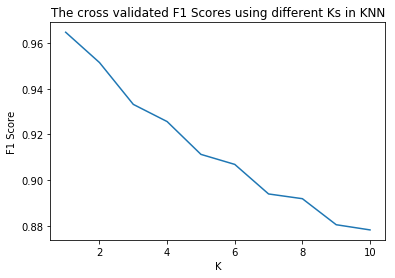

In [17]:
#Scenario 7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pylab as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.utils import resample


#Initiallization
neighbors = np.arange(1,maxK+1)
scores7 = np.array([])          #An array to save FScore of different Ks

#Feature Selection (Sparse Features)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(scaledOversampledX, scaledOversampledy)
model = SelectFromModel(lsvc, prefit=True)
fSelX = model.transform(scaledOversampledX)          #feature selected X
fSely = scaledOversampledy
print('\nThe numer of features after feture sparsing: ',fSelX.shape[1])

#Evaluate differnt Ks
for k in neighbors:
    print('\n\nThe K value is: ', k)
    #The classifier
    clf = KNeighborsClassifier(n_neighbors=k)      #The defult destance is Euclidian   
    #Cross Validation
    output7 = cross_validate(clf, fSelX, fSely, cv=kFold, scoring='f1_macro', return_estimator=True)         
    scores7 = np.append(scores7, output7['test_score'].mean())
    print('The Mean Fit Time: ', np.mean(output7['fit_time']))
    print('The Mean Score Time: ', np.mean(output7['score_time']))
    print('The averaged F1 Score: ', scores7[k-1])
    
#Report the best K based on the average F-Score from cross validation for each K
optimal_k_7 = np.argmax(scores) + 1
print("\nThe optimal number of neighbors is:", optimal_k_7)

#Plot the results
f = plt.figure()
plt.plot(neighbors, scores7)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('The cross validated F1 Scores using different Ks in KNN')
plt.show()
f.savefig("KNN-Scen7.png", bbox_inches='tight', dpi=600)

<font color='blue'>Final model using: oversampling, feature sparsing, scaling, cross validation, and Manhatan distance</font> 

In [16]:
#Scenario 8
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pylab as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate


#Initiallization
neighbors = np.arange(1,maxK+1)
scores8 = np.array([])          #An array to save FScore of different Ks

#Feature Selection (Sparse Features)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(scaledOversampledX, scaledOversampledy)
model = SelectFromModel(lsvc, prefit=True)
fSelX = model.transform(scaledOversampledX)          #feature selected X
fSely = scaledOversampledy
print('\nThe numer of features after feture sparsing: ',fSelX.shape[1])

#Evaluate differnt Ks
for k in neighbors:
    print('\n\nThe K value is: ', k)
    #The classifier
    clf = KNeighborsClassifier(n_neighbors=k, p=1)        # p=1 is Manhatam distance    
    #Cross Validation
    output8 = cross_validate(clf, fSelX, fSely, cv=kFold, scoring='f1_macro', return_estimator=True)         
    scores8 = np.append(scores8, output8['test_score'].mean())
    print('The Mean Fit Time: ', np.mean(output8['fit_time']))
    print('The Mean Score Time: ', np.mean(output8['score_time']))
    print('The averaged F1 Score: ', scores8[k-1])
    
#Report the best K based on the average F-Score from cross validation for each K
optimal_k_8 = np.argmax(scores) + 1
print("\nThe optimal number of neighbors is:", optimal_k_8)

#Plot the results
f = plt.figure()
plt.plot(neighbors, scores8)
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('The cross validated F1 Scores using different Ks in KNN')
plt.show()
f.savefig("KNN-Scen8.png", bbox_inches='tight', dpi=600)

KeyboardInterrupt: 